<a href="https://colab.research.google.com/github/fstreuter/fstreuter/blob/main/Synthea_Data_Exploration_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
#Benoetigte Libraries werden importiert
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys                                                                                       #os.path bietet Funktionen zur Manipulation von Pfadnamen https://docs.python.org/3/library/os.path.html
import seaborn as sns
import sqlite3


#Aktuelle Python Version wird ausgegeben----------------------------------------
print("Python Version:", sys.version)


#Pfad zum GitHub Repository und Verzeichnisnamen--------------------------------
synthea_url = "https://github.com/MichaelKru92/Projekt-ML-Modelierung"
synthea_dir = "Projekt-ML-Modelierung"

if not os.path.exists(synthea_dir):                                                              #Sofern der Pfad zum Verzeichnis synthea_data noch nicht existiert
    !git clone {synthea_url}                                                                     #Shell command: git kopiere das Repository synthea_url
    print(f"Repository '{synthea_url}' erfolgreich geklont.")
else:
    print(f"Verzeichnis '{synthea_dir}' existiert bereits. Kein erneutes Klonen erforderlich.")


#Inhalte des Verzeichnis inklusiver versteckter Dateien-------------------------
!ls -lah synthea


#Anlegen einer neuen sqlite Datenbank-------------------------------------------
db_name = "synthea.db"                                                                            #DB Dateiname wird vergeben
conn = sqlite3.connect(db_name)                                                                   #Verbindung zur DB Datei wird hergestellt
cur = conn.cursor()                                                                               #Ueber dise Verbindung wird auf die DB ein Cursor gesetzt


Python Version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Verzeichnis 'Projekt-ML-Modelierung' existiert bereits. Kein erneutes Klonen erforderlich.
ls: cannot access 'synthea': No such file or directory


Index(['start', 'stop', 'patient', 'encounter', 'code', 'description'], dtype='object')
51
start           0
stop           48
patient         0
encounter       0
code            0
description     0
dtype: int64
start          object
stop           object
patient        object
encounter      object
code            int64
description    object
dtype: object


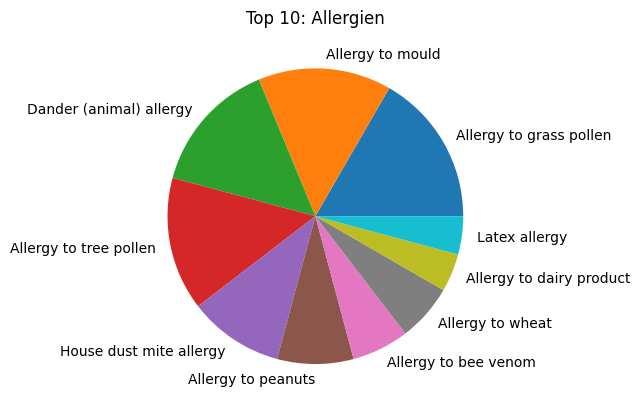

In [ ]:
#Exploration der allergies.csv Dateien als pandas DataFrame
allergies_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/disease.csv")
allergies_df.columns = allergies_df.columns.str.lower()
print(allergies_df.columns)
print(len(allergies_df))
print(allergies_df.isnull().sum())
print(allergies_df.dtypes)
pie_allergies = allergies_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_allergies["counts"], labels = pie_allergies["description"])
plt.title("Top 10: Allergien")
plt.show()


**Ergebnisse:**

Spalten: 'start', 'stop', 'patient', 'encounter', 'code', 'description'

Zeilen:   51

NaN: stop 48

Datentypen:
start = object | stop = object | patient = object | encounter = object |
code = int64 | description = object



Index(['id', 'start', 'stop', 'patient', 'encounter', 'code', 'description',
       'reasoncode', 'reasondescription'],
      dtype='object')
545
id                     0
start                  0
stop                 164
patient                0
encounter              0
code                   0
description            0
reasoncode            23
reasondescription     23
dtype: int64
id                    object
start                 object
stop                  object
patient               object
encounter             object
code                   int64
description           object
reasoncode           float64
reasondescription     object
dtype: object
0              NaN
1       59621000.0
2       44054006.0
3       59621000.0
4       10509002.0
          ...     
540     55822004.0
541     33737001.0
542    284549007.0
543    840544004.0
544    840539006.0
Name: reasoncode, Length: 545, dtype: float64


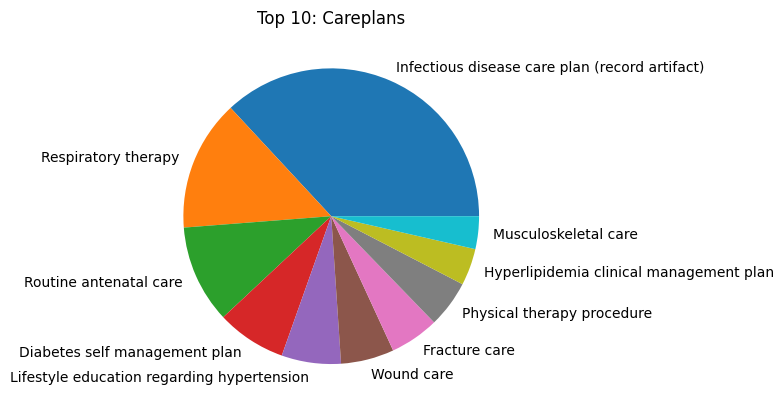

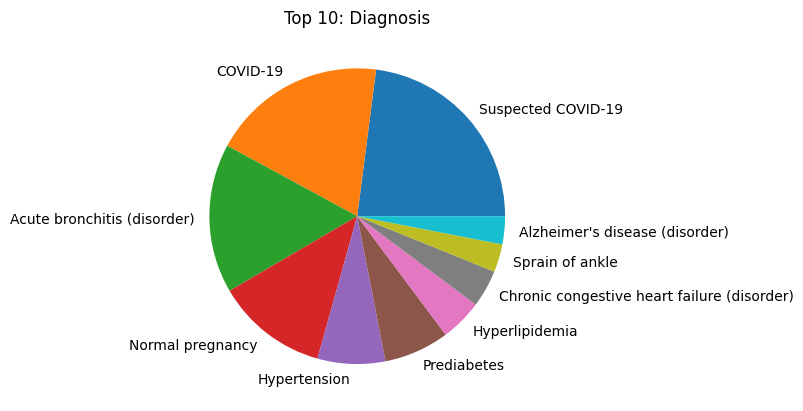

In [117]:
#Exploration der careplans.csv Dateien als pandas DataFrame
careplans_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/careplans.csv")
careplans_df.columns = careplans_df.columns.str.lower()
print(careplans_df.columns)
print(len(careplans_df))
print(careplans_df.isnull().sum())
print(careplans_df.dtypes)
print(careplans_df["reasoncode"])
pie_careplans = careplans_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_careplans["counts"], labels = pie_careplans["description"])
plt.title("Top 10: Careplans")
plt.show()
pie_diagnosis = careplans_df["reasondescription"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_diagnosis["counts"], labels = pie_diagnosis["reasondescription"])
plt.title("Top 10: Diagnosis")
plt.show()

**Ergebnisse:**

Spalten: 'id', 'start', 'stop', 'patient', 'encounter', 'code', 'description',
       'reasoncode', 'reasondescription'

Zeilen: 545

NaN:
stop: 164
reasoncode: 23
reasondescription: 23

id = object |
start = object |
stop = object |
patient = object |
encounter = object |
code = int64 |
description = object |
reasoncode = float64 |
reasondescription = object

Index(['start', 'stop', 'patient', 'encounter', 'code', 'description'], dtype='object')
1601
start            0
stop           504
patient          0
encounter        0
code             0
description      0
dtype: int64
start          object
stop           object
patient        object
encounter      object
code            int64
description    object
dtype: object
0       232353008
1       162864005
2       162864005
3       128613002
4       703151001
          ...    
1596    248595008
1597    386661006
1598     36955009
1599    840544004
1600    840539006
Name: code, Length: 1601, dtype: int64


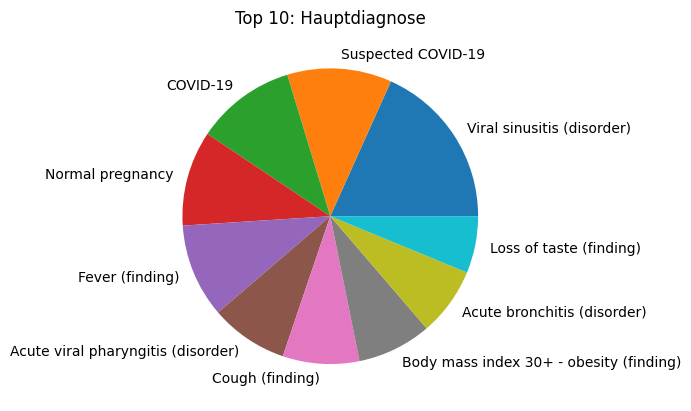

In [ ]:
#Exploration der conditions.csv Dateien als pandas DataFrame
conditions_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/conditions.csv")
conditions_df.columns = conditions_df.columns.str.lower()
print(conditions_df.columns)
print(len(conditions_df))
print(conditions_df.isnull().sum())
print(conditions_df.dtypes)
print(conditions_df["code"])
pie_conditions = conditions_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_conditions["counts"], labels = pie_conditions["description"])
plt.title("Top 10: Hauptdiagnose")
plt.show()


**Ergbenisse:**

Spalten: 'start', 'stop', 'patient', 'encounter', 'code', 'description'

Zeilen: 1601

NaN: stop = 504

Datentypen:
start = object |
stop = object |
patient = object |
encounter = object |
code = int64 |
description = object

Index(['start', 'stop', 'patient', 'encounter', 'code', 'description', 'udi'], dtype='object')
26
start           0
stop           11
patient         0
encounter       0
code            0
description     0
udi             0
dtype: int64
start          object
stop           object
patient        object
encounter      object
code            int64
description    object
udi            object
dtype: object
0     706004007
1     449071006
2     448907002
3     449071006
4     448907002
5      72506001
6     706004007
7     705643001
8      72506001
9     449071006
10    448907002
11     36965003
12     36965003
13     36965003
14     36965003
15     36965003
16     36965003
17     36965003
18     36965003
19     36965003
20    705643001
21    705643001
22     72506001
23    705643001
24    705643001
25    705643001
Name: code, dtype: int64


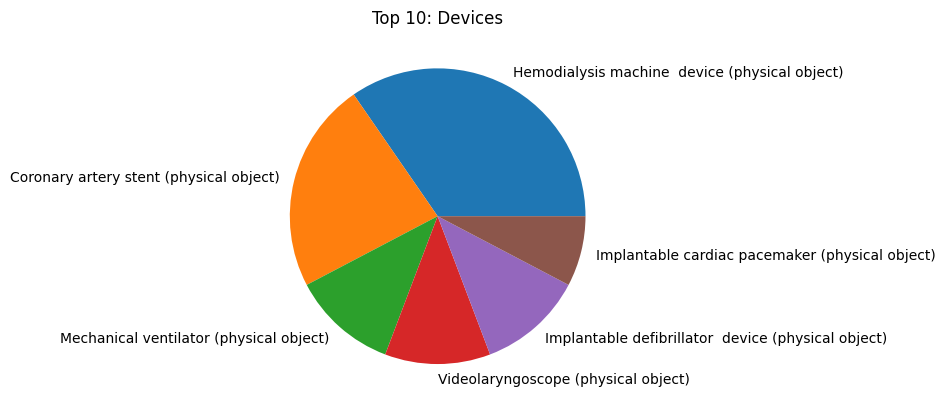

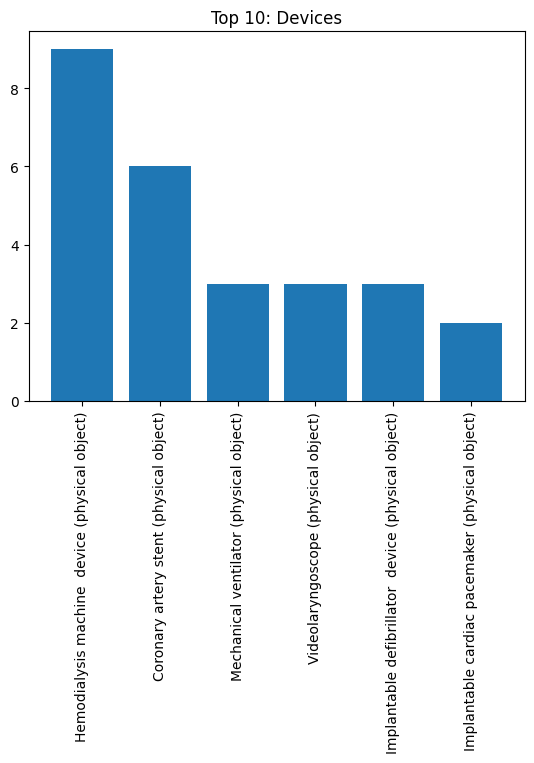

In [ ]:
#Exploration der devices.csv Dateien als pandas DataFrame
devices_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/devices.csv")
devices_df.columns = devices_df.columns.str.lower()
print(devices_df.columns)
print(len(devices_df))
print(devices_df.isnull().sum())
print(devices_df.dtypes)
print(devices_df["code"])
pie_devices = devices_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_devices["counts"], labels = pie_devices["description"])
plt.title("Top 10: Devices")
plt.show()
plt.bar(pie_devices["description"], pie_devices["counts"])
plt.title("Top 10: Devices")
plt.xticks(rotation=90)
plt.show()

Ergebnisse:
Spalten: 'start', 'stop', 'patient', 'encounter', 'code', 'description', 'udi'

Zeilen: 26

NaN: stop = 11

Datentypen:
start = object |
stop = float64 |
patient = object |
encounter = object |
code = int64 |
description = object |
udi = object |

Index(['id', 'start', 'stop', 'patient', 'organization', 'provider', 'payer',
       'encounterclass', 'code', 'description', 'base_encounter_cost',
       'total_claim_cost', 'payer_coverage', 'reasoncode',
       'reasondescription'],
      dtype='object')
7768
id                        0
start                     0
stop                      0
patient                   0
organization              0
provider                  0
payer                     0
encounterclass            0
code                      0
description               0
base_encounter_cost       0
total_claim_cost          0
payer_coverage            0
reasoncode             5941
reasondescription      5941
dtype: int64
id                      object
start                   object
stop                    object
patient                 object
organization            object
provider                object
payer                   object
encounterclass          object
code                     int64
description             

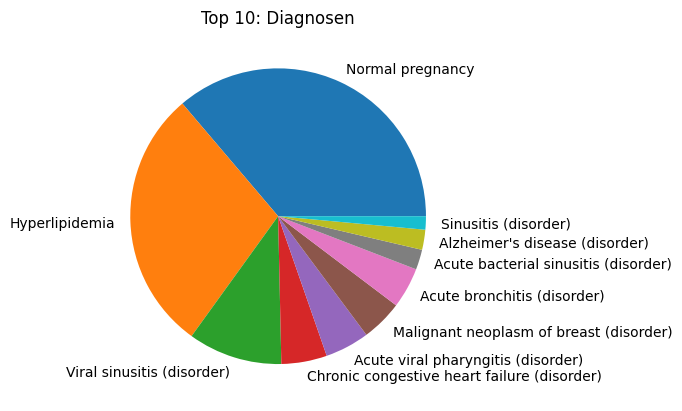

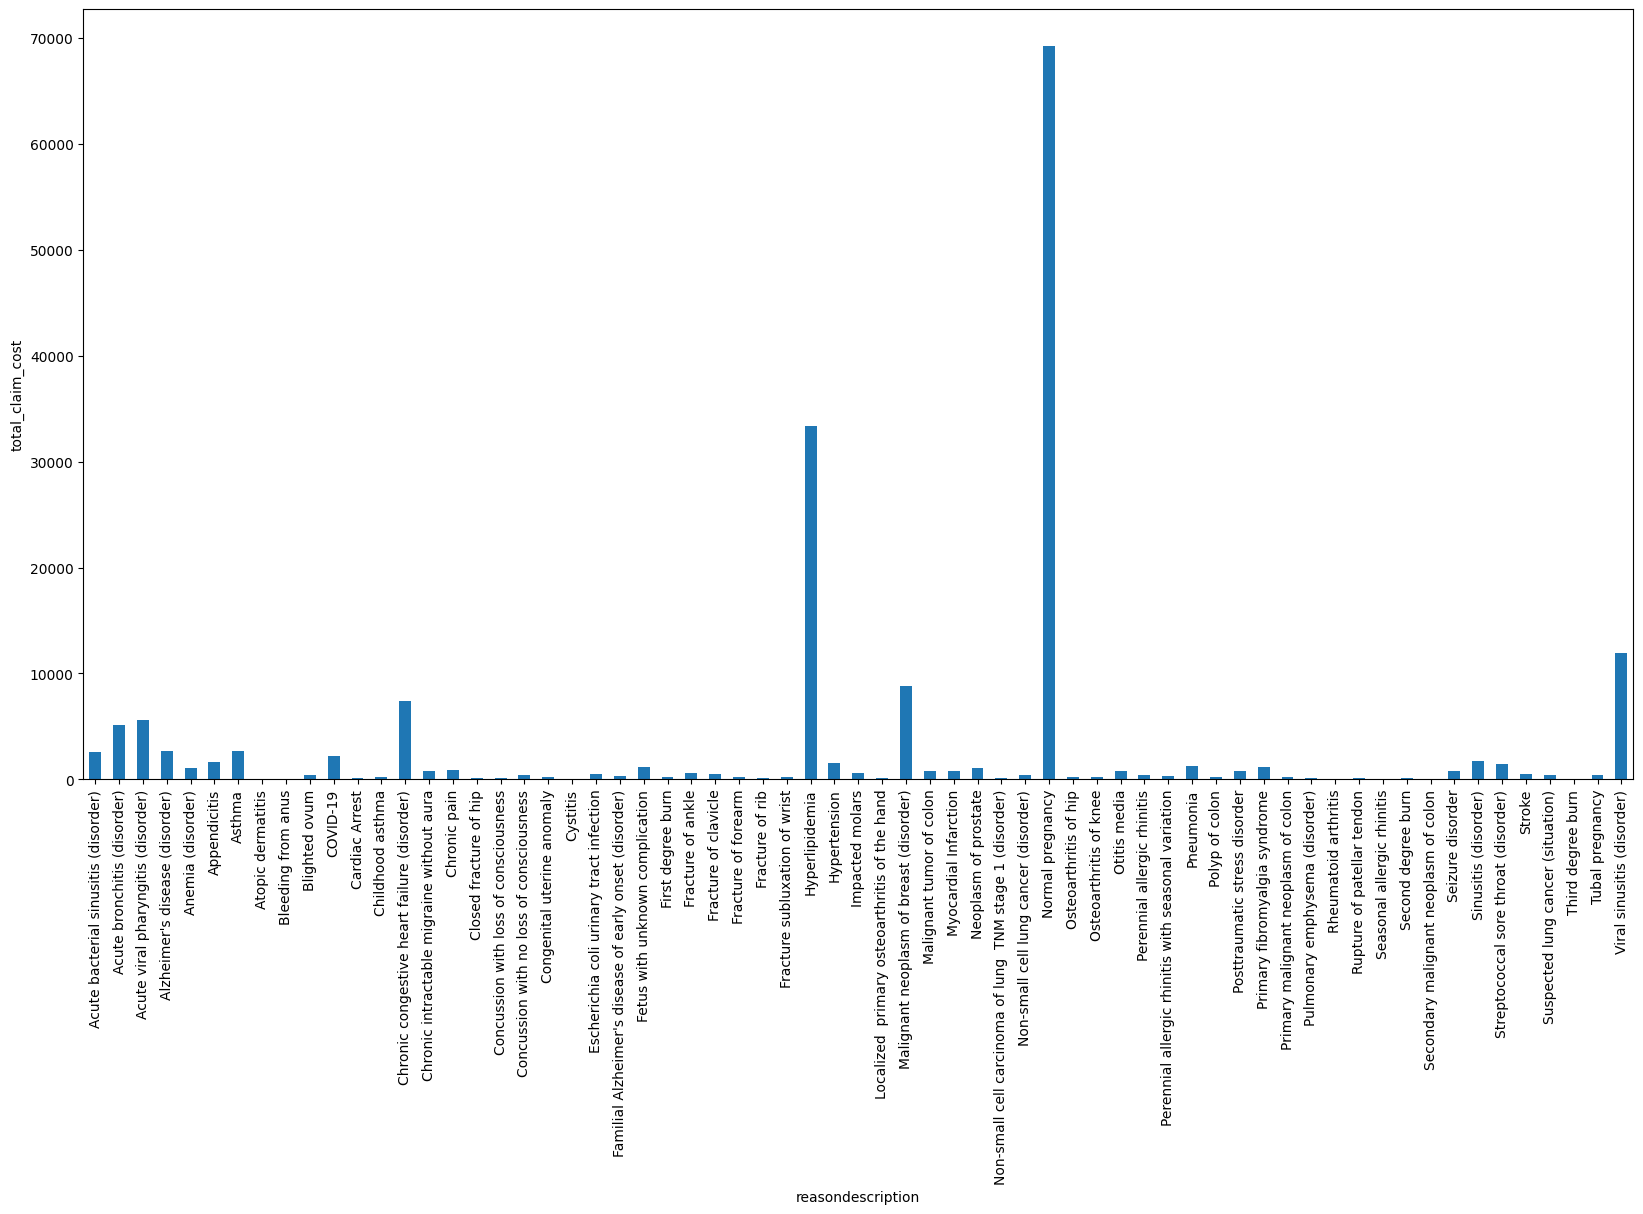

In [ ]:
#Exploration der encounters.csv Dateien als pandas DataFrame
encounters_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/encounters.csv")
encounters_df.columns = encounters_df.columns.str.lower()
print(encounters_df.columns)
print(len(encounters_df))
print(encounters_df.isnull().sum())
print(encounters_df.dtypes)
print(encounters_df["code"])
pie_encounters = encounters_df["reasondescription"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_encounters["counts"], labels = pie_encounters["reasondescription"])
plt.title("Top 10: Diagnosen")
plt.show()

encounters_df["total_claim_cost"] = encounters_df["total_claim_cost"].astype(int)
encounters_df["reasondescription"] = encounters_df["reasondescription"].astype(str)
encounters_df = encounters_df.dropna()

df_test = encounters_df.groupby("reasondescription")["total_claim_cost"].sum()
df_test.plot.bar(figsize=(20,10))
plt.ylabel("total_claim_cost")
plt.show()



Index(['id', 'date', 'patient', 'encounter', 'bodysite_code',
       'bodysite_description', 'modality_code', 'modality_description',
       'sop_code', 'sop_description'],
      dtype='object')
75
id                      0
date                    0
patient                 0
encounter               0
bodysite_code           0
bodysite_description    0
modality_code           0
modality_description    0
sop_code                0
sop_description         0
dtype: int64
id                      object
date                    object
patient                 object
encounter               object
bodysite_code            int64
bodysite_description    object
modality_code           object
modality_description    object
sop_code                object
sop_description         object
dtype: object


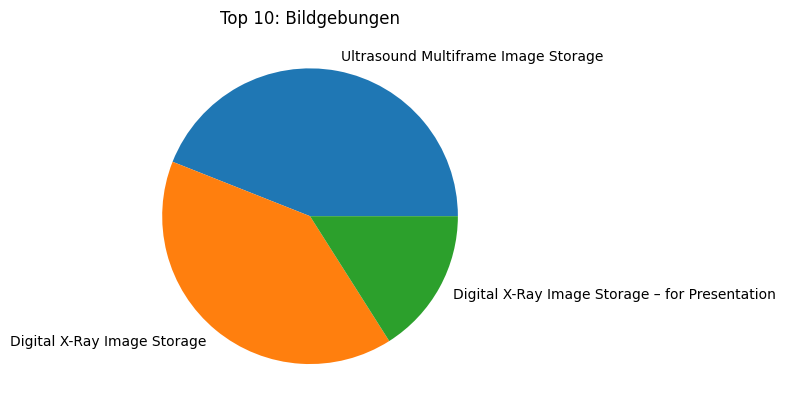

In [ ]:
#Exploration der imaging_studies.csv Dateien als pandas DataFrame
imaging_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/imaging_studies.csv")
imaging_df.columns = imaging_df.columns.str.lower()
print(imaging_df.columns)
print(len(imaging_df))
print(imaging_df.isnull().sum())
print(imaging_df.dtypes)

pie_imaging = imaging_df["sop_description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_imaging["counts"], labels = pie_imaging["sop_description"])
plt.title("Top 10: Bildgebungen")
plt.show()


Index(['date', 'patient', 'encounter', 'code', 'description', 'base_cost'], dtype='object')
1671
date           0
patient        0
encounter      0
code           0
description    0
base_cost      0
dtype: int64
date            object
patient         object
encounter       object
code             int64
description     object
base_cost      float64
dtype: object


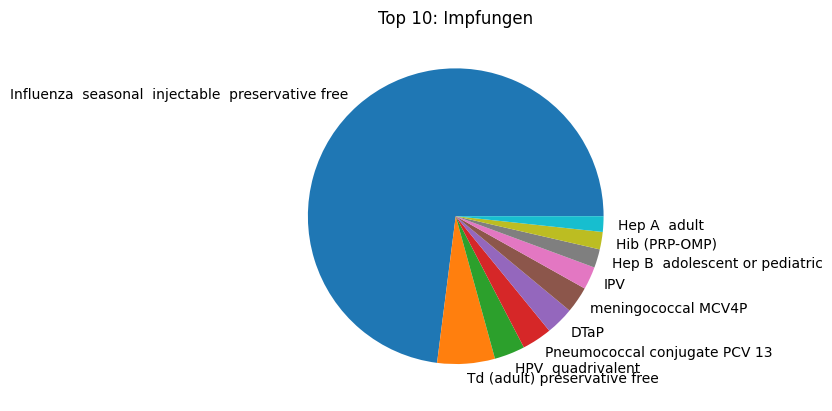

In [ ]:
#Exploration der immunizations.csv Dateien als pandas DataFrame
immunization_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/immunizations.csv")
immunization_df.columns = immunization_df.columns.str.lower()
print(immunization_df.columns)
print(len(immunization_df))
print(immunization_df.isnull().sum())
print(immunization_df.dtypes)

pie_immunization = immunization_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_immunization["counts"], labels = pie_immunization["description"])
plt.title("Top 10: Impfungen")
plt.show()

Index(['start', 'stop', 'patient', 'payer', 'encounter', 'code', 'description',
       'base_cost', 'payer_coverage', 'dispenses', 'totalcost', 'reasoncode',
       'reasondescription'],
      dtype='object')
8536
start                   0
stop                  304
patient                 0
payer                   0
encounter               0
code                    0
description             0
base_cost               0
payer_coverage          0
dispenses               0
totalcost               0
reasoncode           1707
reasondescription    1707
dtype: int64
start                 object
stop                  object
patient               object
payer                 object
encounter             object
code                   int64
description           object
base_cost            float64
payer_coverage       float64
dispenses              int64
totalcost            float64
reasoncode           float64
reasondescription     object
dtype: object


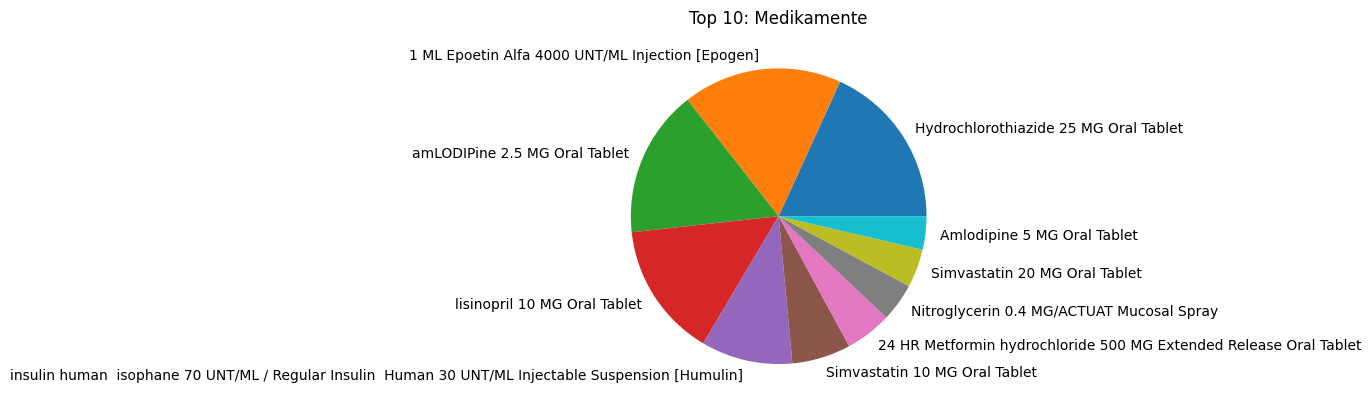

In [ ]:
#Exploration der medications.csv Dateien als pandas DataFrame
medications_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/medications.csv")
medications_df.columns = medications_df.columns.str.lower()
print(medications_df.columns)
print(len(medications_df))
print(medications_df.isnull().sum())
print(medications_df.dtypes)

pie_medications = medications_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_medications["counts"], labels = pie_medications["description"])
plt.title("Top 10: Medikamente")
plt.show()

Index(['date', 'patient', 'encounter', 'code', 'description', 'value', 'units',
       'type'],
      dtype='object')
47331
date              0
patient           0
encounter      3183
code              0
description       0
value             0
units          2157
type              0
dtype: int64
date           object
patient        object
encounter      object
code           object
description    object
value          object
units          object
type           object
dtype: object


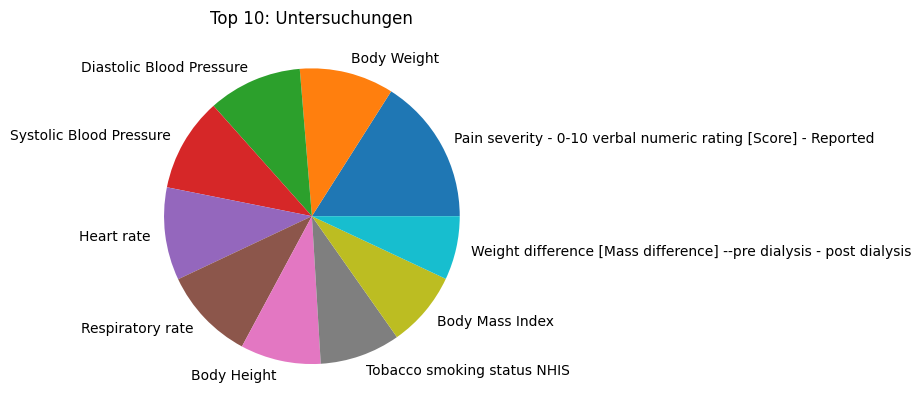

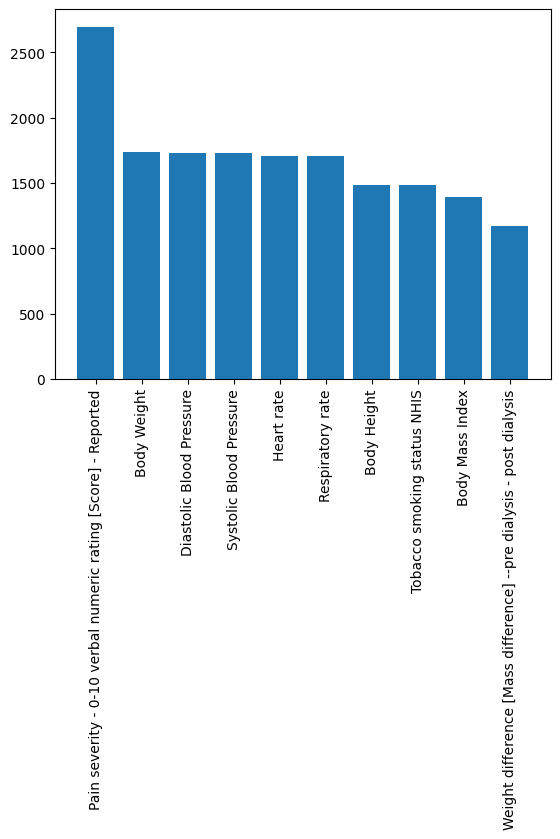

In [ ]:
#Exploration der observations.csv Dateien als pandas DataFrame
observations_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/observations.csv")
observations_df.columns = observations_df.columns.str.lower()
print(observations_df.columns)
print(len(observations_df))
print(observations_df.isnull().sum())
print(observations_df.dtypes)

pie_observations = observations_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_observations["counts"], labels = pie_observations["description"])
plt.title("Top 10: Untersuchungen")
plt.show()

plt.bar(pie_observations["description"], pie_observations["counts"])
plt.xticks(rotation=90)
plt.show()


Index(['id', 'name', 'address', 'city', 'state', 'zip', 'lat', 'lon', 'phone',
       'revenue', 'utilization'],
      dtype='object')
216
id              0
name            0
address         0
city            0
state           0
zip             0
lat             0
lon             0
phone          25
revenue         0
utilization     0
dtype: int64
id              object
name            object
address         object
city            object
state           object
zip             object
lat            float64
lon            float64
phone           object
revenue        float64
utilization      int64
dtype: object


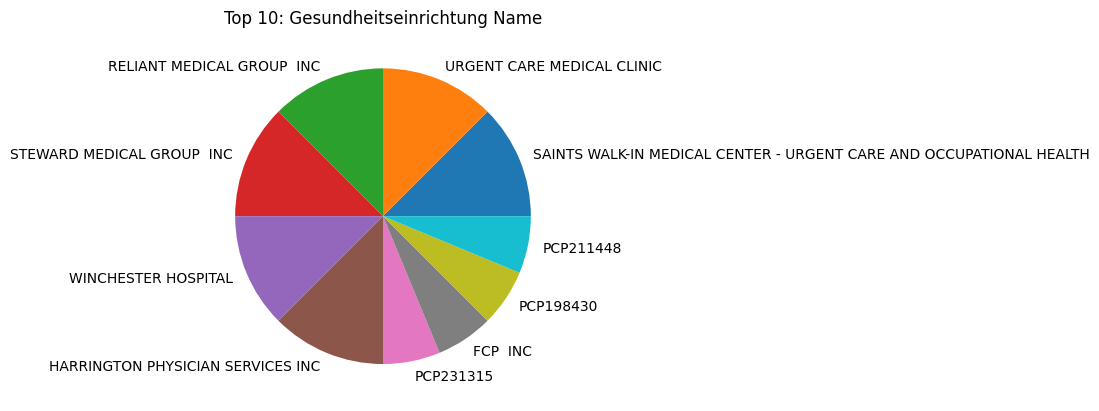

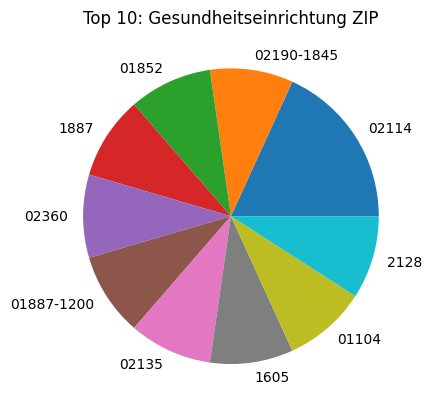

In [ ]:
#Exploration der organizations.csv Dateien als pandas DataFrame
organizations_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/organizations.csv")
organizations_df.columns = organizations_df.columns.str.lower()
print(organizations_df.columns)
print(len(organizations_df))
print(organizations_df.isnull().sum())
print(organizations_df.dtypes)

pie_organizations = organizations_df["name"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_organizations["counts"], labels = pie_organizations["name"])
plt.title("Top 10: Gesundheitseinrichtung Name")
plt.show()

pie_organizations2 = organizations_df["zip"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_organizations2["counts"], labels = pie_organizations2["zip"])
plt.title("Top 10: Gesundheitseinrichtung ZIP")
plt.show()


Index(['id', 'birthdate', 'deathdate', 'ssn', 'drivers', 'passport', 'prefix',
       'first', 'last', 'suffix', 'maiden', 'marital', 'race', 'ethnicity',
       'gender', 'birthplace', 'address', 'city', 'state', 'county', 'zip',
       'lat', 'lon', 'healthcare_expenses', 'healthcare_coverage'],
      dtype='object')
135
id                       0
birthdate                0
deathdate              100
ssn                      0
drivers                 16
passport                25
prefix                  22
first                    0
last                     0
suffix                 134
maiden                 103
marital                 36
race                     0
ethnicity                0
gender                   0
birthplace               0
address                  0
city                     0
state                    0
county                   0
zip                     64
lat                      0
lon                      0
healthcare_expenses      0
healthcare_coverage      0


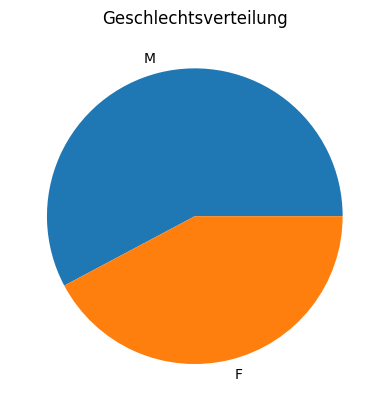

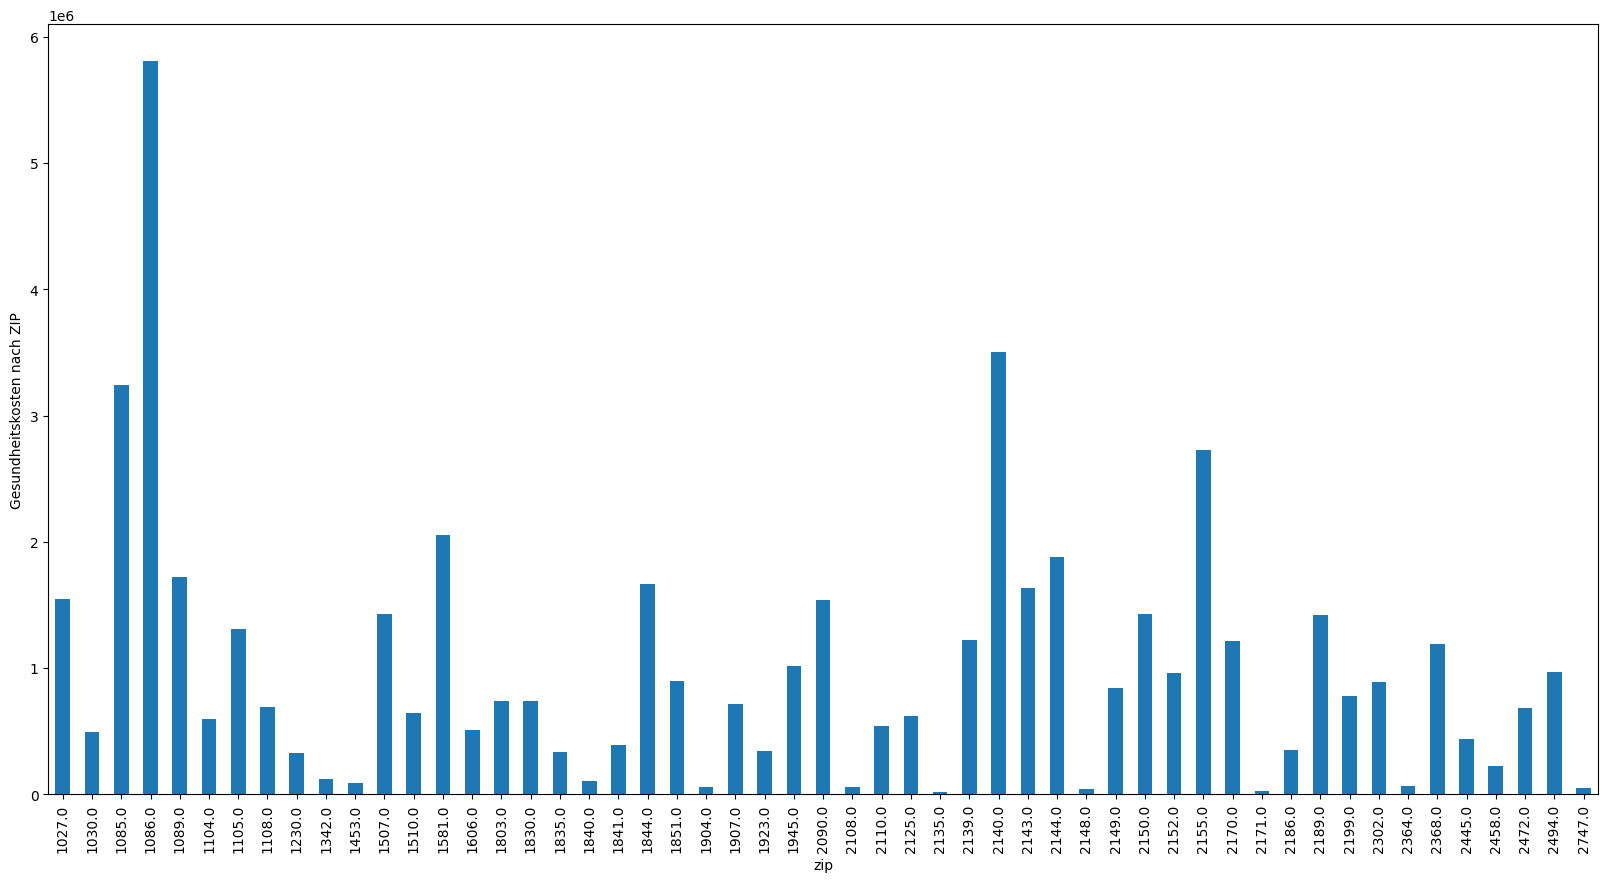

In [ ]:
#Exploration der patients.csv Dateien als pandas DataFrame
patients_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/patients.csv")
patients_df.columns = patients_df.columns.str.lower()
print(patients_df.columns)
print(len(patients_df))
print(patients_df.isnull().sum())
print(patients_df.dtypes)

pie_patients = patients_df["gender"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_patients["counts"], labels = pie_patients["gender"])
plt.title("Geschlechtsverteilung")
plt.show()

patients_df["healthcare_expenses"] = patients_df["healthcare_expenses"].astype(int)

df_test = patients_df.groupby("zip")["healthcare_expenses"].sum()
df_test.plot.bar(figsize=(20,10))
plt.ylabel("Gesundheitskosten nach ZIP")
plt.show()

Index(['id', 'name', 'address', 'city', 'state_headquartered', 'zip', 'phone',
       'amount_covered', 'amount_uncovered', 'revenue', 'covered_encounters',
       'uncovered_encounters', 'covered_medications', 'uncovered_medications',
       'covered_procedures', 'uncovered_procedures', 'covered_immunizations',
       'uncovered_immunizations', 'unique_customers', 'qols_avg',
       'member_months'],
      dtype='object')
10
id                         0
name                       0
address                    1
city                       1
state_headquartered        1
zip                        1
phone                      1
amount_covered             0
amount_uncovered           0
revenue                    0
covered_encounters         0
uncovered_encounters       0
covered_medications        0
uncovered_medications      0
covered_procedures         0
uncovered_procedures       0
covered_immunizations      0
uncovered_immunizations    0
unique_customers           0
qols_avg           

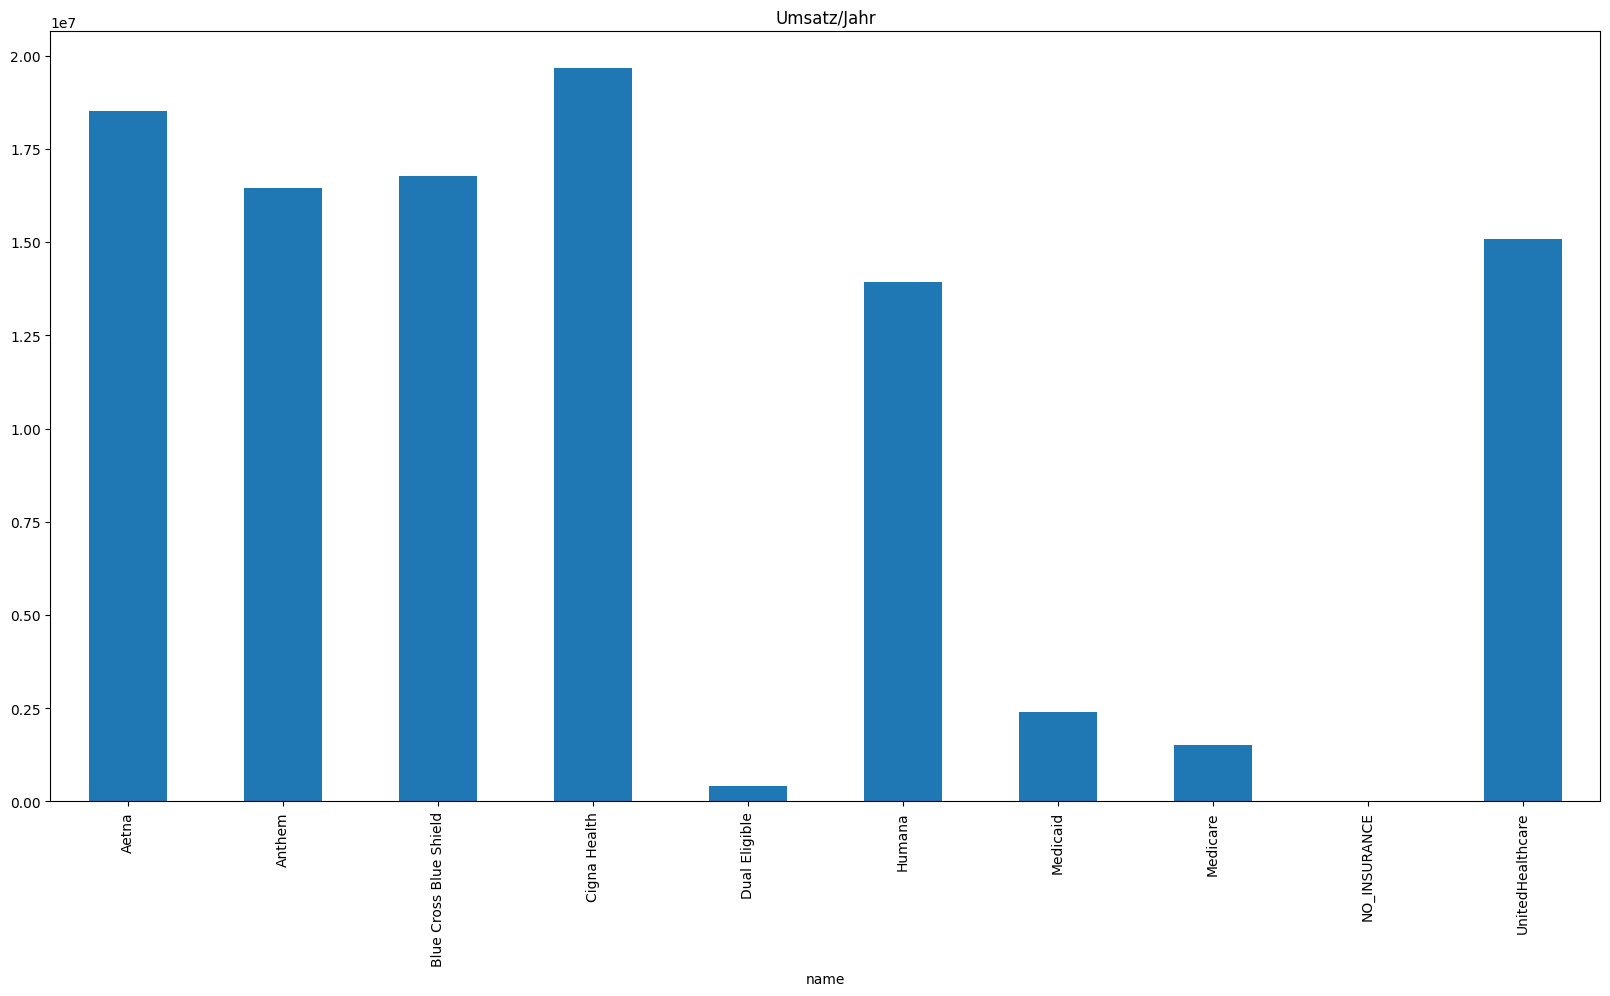

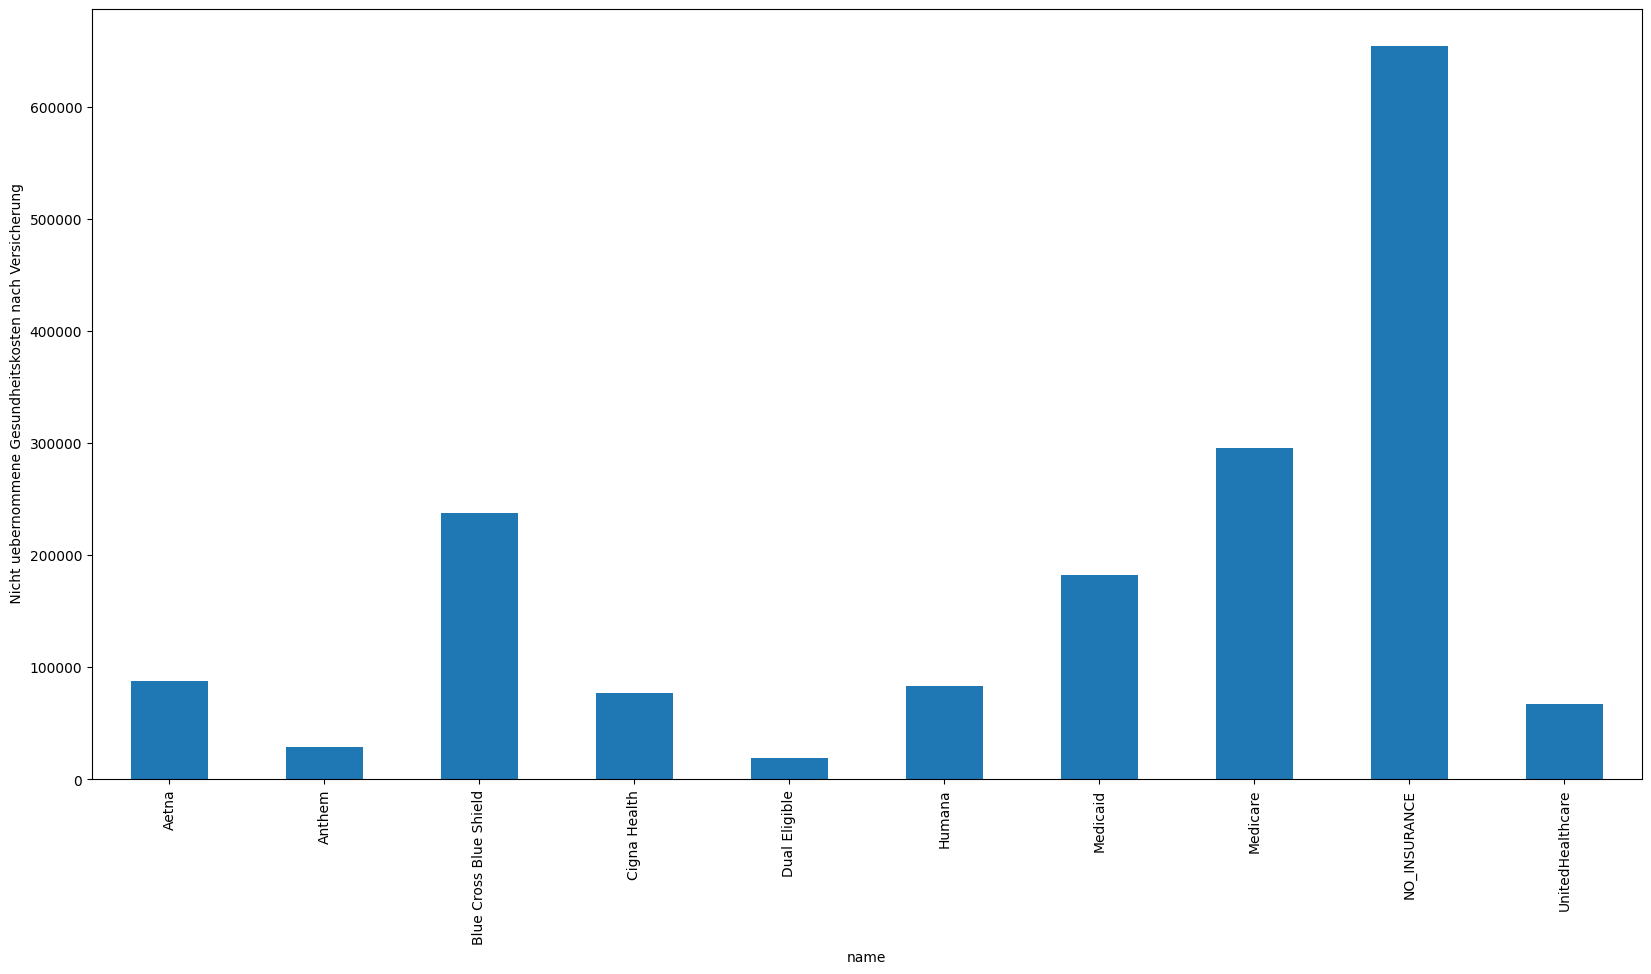

In [ ]:
#Exploration der payers.csv Dateien als pandas DataFrame
payers_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/payers.csv")
payers_df.columns = payers_df.columns.str.lower()
print(payers_df.columns)
print(len(payers_df))
print(payers_df.isnull().sum())
print(payers_df.dtypes)


payers_df["amount_uncovered"] = payers_df["amount_uncovered"].astype(int)
payers_df["revenue"] = payers_df["revenue"].astype(int)

df_revenue = payers_df.groupby("name")["revenue"].sum()
df_revenue.plot.bar(figsize=(20,10))
plt.title("Umsatz/Jahr")
plt.show()

df_test = payers_df.groupby("name")["amount_uncovered"].sum()
df_test.plot.bar(figsize=(20,10))
plt.ylabel(" Nicht uebernommene Gesundheitskosten nach Versicherung")
plt.show()

Index(['date', 'patient', 'encounter', 'code', 'description', 'base_cost',
       'reasoncode', 'reasondescription'],
      dtype='object')
5815
date                    0
patient                 0
encounter               0
code                    0
description             0
base_cost               0
reasoncode           2699
reasondescription    2699
dtype: int64
date                  object
patient               object
encounter             object
code                   int64
description           object
base_cost            float64
reasoncode           float64
reasondescription     object
dtype: object


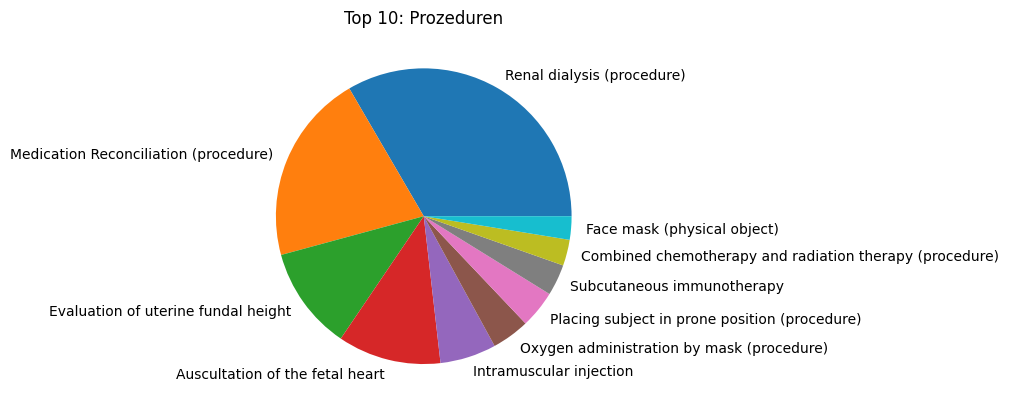

In [ ]:
#Exploration der procedures.csv Dateien als pandas DataFrame
procedures_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/procedures.csv")
procedures_df.columns = procedures_df.columns.str.lower()
print(procedures_df.columns)
print(len(procedures_df))
print(procedures_df.isnull().sum())
print(procedures_df.dtypes)

pie_procedures = procedures_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_procedures["counts"], labels = pie_procedures["description"])
plt.title("Top 10: Prozeduren")
plt.show()

Index(['id', 'organization', 'name', 'gender', 'speciality', 'address', 'city',
       'state', 'zip', 'lat', 'lon', 'utilization'],
      dtype='object')
1079
id              0
organization    0
name            0
gender          0
speciality      0
address         0
city            0
state           0
zip             0
lat             0
lon             0
utilization     0
dtype: int64
id               object
organization     object
name             object
gender           object
speciality       object
address          object
city             object
state            object
zip              object
lat             float64
lon             float64
utilization       int64
dtype: object


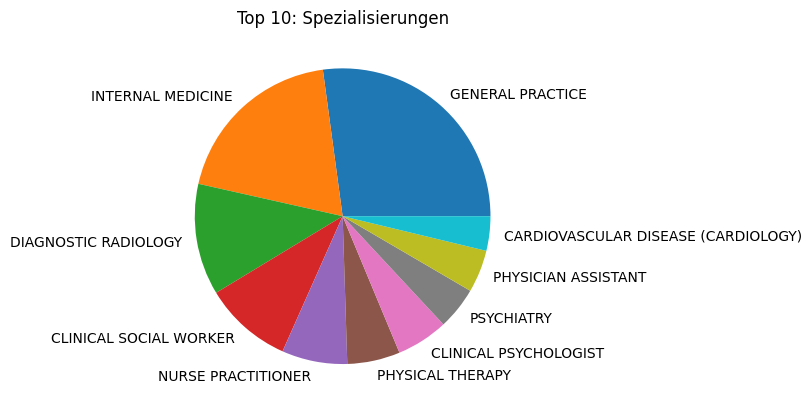

In [ ]:
#Exploration der providers.csv Dateien als pandas DataFrame
providers_df = pd.read_csv("https://raw.githubusercontent.com/MichaelKru92/Projekt-ML-Modelierung/refs/heads/main/providers.csv")
providers_df.columns = providers_df.columns.str.lower()
print(providers_df.columns)
print(len(providers_df))
print(providers_df.isnull().sum())
print(providers_df.dtypes)

pie_providers = providers_df["speciality"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_providers["counts"], labels = pie_providers["speciality"])
plt.title("Top 10: Spezialisierungen")
plt.show()

**Aufbau eines SQL-Schemas**

Analog zu den Spalten der in unserem GitHub Repository vorhandenen CSV Dateien erstellen wir im naechsten Abschnitt ein SQL-Tabellen in dritter Normalform. Primaerschluessel und Fremdschluessel sind entsprechend des auf GitHub hinterlegten Datenbankschemas vergeben:
https://github.com/MichaelKru92/Projekt-ML-Modelierung/wiki/Datenbank

In [74]:
#Aufbau einer sqlite Datenbank in 3 NF entsprechend der .csv Dateien

sql_table_patients = """
CREATE TABLE IF NOT EXISTS patients (
    Id STRING PRIMARY KEY,
    BIRTHDATE DATE,
    DEATHDATE DATE,
    SSN STRING,
    DRIVERS STRING,
    PASSPORT STRING,
    PREFIX STRING,
    FIRST STRING,
    LAST STRING,
    SUFFIX STRING,
    MAIDEN STRING,
    MARITAL STRING,
    RACE STRING,
    ETHNICITY STRING,
    GENDER STRING,
    BIRTHPLACE STRING,
    ADDRESS STRING,
    CITY STRING,
    STATE STRING,
    COUNTRY STRING,
    ZIP STRING,
    LAT INTEGER,
    LON INTEGER,
    HEALTHCARE_EXPENSES INTEGER,
    HEALTHCARE_COVERAGE INTEGER
);
"""
cur.execute(sql_table_patients)

sql_table_encounters = """
CREATE TABLE IF NOT EXISTS encounters (
    Id STRING PRIMARY KEY,
    START DATE,
    STOP DATE,
    PATIENT STRING,
    ORGANIZATION STRING,
    PROVIDER STRING,
    PAYER STRING,
    ENCOUNTERCLASS STRING,
    CODE STRING,
    DESCRIPTION STRING,
    BASE_ENCOUNTER_COST INTEGER,
    TOTAL_CLAIM_COST INTEGER,
    PAYER_COVERAGE INTEGER,
    REASONCODE STRING,
    REASONDESCRIPTION STRING,
    FOREIGN KEY (PATIENT)
       REFERENCES patients (Id)
    FOREIGN KEY (ORGANIZATION)
       REFERENCES organizations (Id)
    FOREIGN KEY (PROVIDER)
       REFERENCES providers (Id)
    FOREIGN KEY (PAYER)
       REFERENCES payers (Id)
);
"""
cur.execute(sql_table_encounters)

sql_table_careplans = """
CREATE TABLE IF NOT EXISTS careplans (
    Id STRING PRIMARY KEY,
    START DATE,
    STOP DATE,
    PATIENT STRING,
    ENCOUNTER STRING,
    CODE STRING,
    DESCRIPTION STRING,
    REASONCODE STRING,
    REASONDESCRIPTION STRING,
    FOREIGN KEY (PATIENT)
       REFERENCES patients (Id),
    FOREIGN KEY (ENCOUNTER)
       REFERENCES encounters (Id)
);
"""
cur.execute(sql_table_careplans)

sql_table_conditions = """
CREATE TABLE IF NOT EXISTS conditions (
    START DATE,
    STOP DATE,
    PATIENT STRING,
    ENCOUNTER STRING,
    CODE STRING,
    DESCRIPTION STRING,
    FOREIGN KEY (PATIENT)
       REFERENCES patients (Id),
    FOREIGN KEY (ENCOUNTER)
       REFERENCES encounters (Id)
);
"""
cur.execute(sql_table_conditions)

sql_table_medications = """
CREATE TABLE IF NOT EXISTS medications (
    START DATE,
    STOP DATE,
    PATIENT STRING,
    PAYER STRING,
    ENCOUNTER STRING,
    CODE STRING,
    DESCRIPTION STRING,
    BASE_COST INTEGER,
    PAYER_COVERAGE INTEGER,
    DISPENSES INTEGER,
    TOTALCOST INTEGER,
    REASONCODE STRING,
    REASONDESCRIPTION STRING,
    FOREIGN KEY (PATIENT)
       REFERENCES patients (Id)
    FOREIGN KEY (ENCOUNTER)
       REFERENCES encounters (Id)
);
"""
cur.execute(sql_table_medications)

sql_table_procedures = """
CREATE TABLE IF NOT EXISTS procedures (
    DATE DATE,
    PATIENT STRING,
    ENCOUNTER STRING,
    CODE STRING,
    DESCRIPTION STRING,
    BASE_COST INTEGER,
    REASONCODE STRING,
    REASONDESCRIPTION STRING,
    FOREIGN KEY (PATIENT)
       REFERENCES patients (Id),
    FOREIGN KEY (ENCOUNTER)
       REFERENCES encounters (Id)
);
"""
cur.execute(sql_table_procedures)

sql_table_observations = """
CREATE TABLE IF NOT EXISTS observations (
    DATE DATE,
    PATIENT STRING,
    ENCOUNTER STRING,
    CODE STRING,
    DESCRIPTION STRING,
    VALUE STRING,
    UNITS STRING,
    TYPE STRING,
    FOREIGN KEY (PATIENT)
       REFERENCES patients (Id),
    FOREIGN KEY (ENCOUNTER)
       REFERENCES encounters (Id)
);
"""
cur.execute(sql_table_observations)

sql_table_devices = """
CREATE TABLE IF NOT EXISTS devices (
    START DATE,
    STOP DATE,
    PATIENT STRING,
    ENCOUNTER STRING,
    CODE STRING,
    DESCRIPTION STRING,
    UDI STRING,
    FOREIGN KEY (PATIENT)
       REFERENCES patients (Id),
    FOREIGN KEY (ENCOUNTER)
       REFERENCES encounters (Id)
);
"""
cur.execute(sql_table_devices)

sql_table_imaging = """
CREATE TABLE IF NOT EXISTS imaging_studies (
    Id STRING PRIMARY KEY,
    DATE DATE,
    PATIENT STRING,
    ENCOUNTER STRING,
    BODYSITE_CODE STRING,
    BODYSITE_DESCRIPTION STRING,
    MODALITY_CODE STRING,
    MODALITY_DESCRIPTION STRING,
    SOP_CODE STRING,
    SOP_DESCRIPTION STRING,
    FOREIGN KEY (PATIENT)
       REFERENCES patients (Id),
    FOREIGN KEY (ENCOUNTER)
       REFERENCES encounters (Id)
);
"""
cur.execute(sql_table_imaging)

sql_table_immunizations = """
CREATE TABLE IF NOT EXISTS immunizations (
    DATE DATE,
    PATIENT STRING,
    ENCOUNTER STRING,
    CODE STRING,
    DESCRIPTION STRING,
    BASE_COST INTEGER,
    FOREIGN KEY (PATIENT)
       REFERENCES patients (Id),
    FOREIGN KEY (ENCOUNTER)
       REFERENCES encounters (Id)
);
"""
cur.execute(sql_table_immunizations)

sql_table_organizations = """
CREATE TABLE IF NOT EXISTS organizations (
                            Id STRING PRIMARY KEY,
                            NAME STRING,
                            ADDRESS STRING,
                            CITY STRING,
                            STATE STRING,
                            ZIP STRING,
                            LAT NUMERIC,
                            LON NUMERIC,
                            PHONE STRING,
                            REVENUE NUMERIC,
                            UTILIZATION INTEGER
                    );"""
cur.execute(sql_table_organizations)

sql_table_providers = """CREATE TABLE IF NOT EXISTS providers (
                            Id STRING PRIMARY KEY,
                            ORGANIZATION STRING,
                            NAME STRING,
                            GENDER STRING,
                            SPECIALITY STRING,
                            ADDRESS STRING,
                            CITY STRING,
                            STATE STRING,
                            ZIP STRING,
                            LAT NUMERIC,
                            LON NUMERIC,
                            UTILIZATION INTEGER,
                            FOREIGN KEY (ORGANIZATION)
                                REFERENCES organizations (Id)
                            );"""

cur.execute(sql_table_providers)

sql_table_payers = """CREATE TABLE IF NOT EXISTS payers (
                            Id STRING PRIMARY KEY,
                            NAME STRING,
                            ADDRESS STRING,
                            CITY STRING,
                            STATE_HEADQUARTERED STRING,
                            ZIP STRING,
                            PHONE STRING,
                            AMOUNT_COVERED NUMERIC,
                            AMOUNT_UNCOVERED NUMERIC,
                            REVENUE INTEGER,
                            COVERED_ENCOUNTERS INTEGER,
                            UNCOVERED_ENCOUNTERS INTEGER,
                            COVERED_MEDICATIONS INTEGER,
                            UNCOVERED_MEDICATIONS INTEGER,
                            COVERED_PROCEDURES INTEGER,
                            UNCOVERED_PROCEDURES INTEGER,
                            COVERED_IMMUNIZATIONS INTEGER,
                            UNCOVERED_IMMUNIZATIONS INTEGER,
                            UNIQUE_CUSTOMERS INTEGER,
                            QOLS_AVG NUMERIC,
                            MEMBER_MONTHS INTEGER
                            );"""

cur.execute(sql_table_payers)

sql_table_payer_transitions = """CREATE TABLE IF NOT EXISTS payer_transitions (
                            PATIENT STRING,
                            START_YEAR INTEGER,
                            END_YEAR INTEGER,
                            PAYER STRING,
                            OWNERSHIP STRING,
                            FOREIGN KEY (PATIENT)
                                REFERENCES patients (Id)
                            FOREIGN KEY (PAYER)
                                REFERENCES payers (Id)
)"""

cur.execute(sql_table_payer_transitions)

sql_table_disease = """CREATE TABLE IF NOT EXISTS disease (
                           START DATE,
                           STOP DATE,
                           PATIENT STRING,
                           ENCOUNTER STRING,
                           CODE STRING,
                           DESCRIPTION STRING,
                           FOREIGN KEY (PATIENT)
                              REFERENCES patients (Id)
                           FOREIGN KEY (ENCOUNTER)
                              REFERENCES encounters (Id)

                       );"""

cur.execute(sql_table_disease)

sql_table_providers = """CREATE TABLE IF NOT EXISTS providers (
                           Id STRING PRIMARY KEY,
                           ORGANIZATION STRING,
                           NAME STRING,
                           GENDER STRING,
                           SPECIALITY STRING,
                           FOREIGN KEY (ORGANIZATION)
                              REFERENCES organizations (Id)

                       );"""

cur.execute(sql_table_providers)

sql_table_supplies = """CREATE TABLE IF NOT EXISTS supplies (
                           DATE DATE,
                           PATIENT STRING,
                           ENCOUNTER STRING,
                           CODE STRING,
                           DESCRIPTION STRING,
                           QUANTITY INTEGER,
                           FOREIGN KEY (PATIENT)
                              REFERENCES patients (Id)
                           FOREIGN KEY (ENCOUNTER)
                              REFERENCES encounters (Id)

                       );"""

cur.execute(sql_table_supplies)

conn.commit()
print("Alle Tabellen (3NF) wurden erfolgreich angelegt!")


Alle Tabellen (3NF) wurden erfolgreich angelegt!


**ETL-Pipeline**

In diesem Abschnitt importieren wir die Inhalte der CSV-Dateien über eine Funktion in das oben implementierte SQL-Tabellen-Schema.





In [119]:
# Extraction Transform Load (ETL)-Pipeline zum importieren der .csv Dateien

def import_csv_to_db(csv_path, table_name, columns, cursor):
    """
    Liest die CSV-Datei 'csv_path' ein und importiert sie
    in die Tabelle 'table_name' basierend auf 'columns'.
    """
    if not os.path.exists(csv_path):                                                                  #Korrektheit des angegebenen Pfads wird geprueft
        print(f"[WARNUNG] CSV '{csv_path}' nicht gefunden. Überspringe Import für '{table_name}'.")
        return

    df = pd.read_csv(csv_path)                                                                        #.csv als DataFrame df gespeichert
    print(f"Importiere {len(df)} Zeilen von '{csv_path}' in Tabelle '{table_name}'.")

    placeholders = ",".join(["?"] * len(columns))                                                     #Variable speichert Platzhalter (?) getrennt durch , entsprechend der Spaltenanzahl
    col_names = ",".join(columns)                                                                     #Variable speichert Spaltennamen getrennt durch ,
    insert_sql = f"INSERT OR IGNORE INTO {table_name} ({col_names}) VALUES ({placeholders});"         #Variable speichert INSERT Befehl in Tabelle die Sapltennamen und die Werte zunaechst als (?)

    for _, row in df.iterrows():                                                                      #Befuellen der SQL Tabellen: df.iterrows for Schleife iteriert ueber Tabellendaten als Index,Series Paar
        data_tuple = tuple(row[col] if col in row else None for col in columns)                       #Variable speichert jeden Wert der iterierten Reihe bezogen auf die Spalte (sofern diese in Liste columns vorhanden ist) und fuellt None ein wenn kein Wert vorhanden ist
        cursor.execute(insert_sql, data_tuple)                                                        #INSERT Befehl wird ausgefuehrt und data_tupel als Datenquelle verwendet
    conn.commit()
    print(f"Import in '{table_name}' abgeschlossen.")

base_dir = "Projekt-ML-Modelierung"

# Beispiel: patients.csv
patients_csv = os.path.join(base_dir, "patients.csv")
patients_cols = [
    "Id","BIRTHDATE","DEATHDATE","SSN","DRIVERS","PASSPORT","PREFIX","FIRST","LAST",
    "SUFFIX","MAIDEN","MARITAL","RACE","ETHNICITY","GENDER","BIRTHPLACE","ADDRESS",
    "CITY","STATE","COUNTRY","ZIP","LAT","LON","HEALTHCARE_EXPENSES","HEALTHCARE_COVERAGE"
]
import_csv_to_db(patients_csv, "patients", patients_cols, cur)

# encounters.csv
encounters_csv = os.path.join(base_dir, "encounters.csv")
"""
if os.path.exists(encounters_csv):
    df_enc = pd.read_csv(encounters_csv)
    # Spaltenanpassung ORGANIZATION -> ORGANIZATIONS (falls nötig)
    if 'ORGANIZATION' in df_enc.columns and 'ORGANIZATIONS' not in df_enc.columns:
        df_enc.rename(columns={'ORGANIZATION': 'ORGANIZATIONS'}, inplace=True)
        df_enc.to_csv(encounters_csv, index=False)"""

encounters_cols = [
    "Id","START","STOP","PATIENT","ORGANIZATION","PROVIDER","PAYER","ENCOUNTERCLASS",
    "CODE","DESCRIPTION","BASE_ENCOUNTER_COST","TOTAL_CLAIM_COST","PAYER_COVERAGE",
    "REASONCODE","REASONDESCRIPTION"
]
import_csv_to_db(encounters_csv, "encounters", encounters_cols, cur)

# conditions.csv
conditions_csv = os.path.join(base_dir, "conditions.csv")
conditions_cols = ["START","STOP","PATIENT","ENCOUNTER","CODE","DESCRIPTION"]
import_csv_to_db(conditions_csv, "conditions", conditions_cols, cur)

# careplans.csv
careplans_csv = os.path.join(base_dir, "careplans.csv")
careplans_cols = ["START","STOP","PATIENT","ENCOUNTER","CODE","DESCRIPTION","REASONCODE","REASONDESCRIPTION"]
import_csv_to_db(careplans_csv, "careplans", careplans_cols, cur)

# medications.csv
medications_csv = os.path.join(base_dir, "medications.csv")
medications_cols = [
    "START","STOP","PATIENT","PAYER","ENCOUNTER","CODE","DESCRIPTION","BASE_COST",
    "PAYER_COVERAGE","DISPENSES","TOTALCOST","REASONCODE","REASONDESCRIPTION"
]
import_csv_to_db(medications_csv, "medications", medications_cols, cur)

# procedures.csv
procedures_csv = os.path.join(base_dir, "procedures.csv")
procedures_cols = ["DATE","PATIENT","ENCOUNTER","CODE","DESCRIPTION","BASE_COST","REASONCODE","REASONDESCRIPTION"]
import_csv_to_db(procedures_csv, "procedures", procedures_cols, cur)

# observations.csv
observations_csv = os.path.join(base_dir, "observations.csv")
observations_cols = ["DATE","PATIENT","ENCOUNTER","CODE","DESCRIPTION","VALUE","UNITS","TYPE"]
import_csv_to_db(observations_csv, "observations", observations_cols, cur)

# devices.csv
devices_csv = os.path.join(base_dir, "devices.csv")
devices_cols = ["START","STOP","PATIENT","ENCOUNTER","CODE","DESCRIPTION","UDI"]
import_csv_to_db(devices_csv, "devices", devices_cols, cur)

# imaging_studies.csv
imaging_csv = os.path.join(base_dir, "imaging_studies.csv")
imaging_cols = [
    "Id","DATE","PATIENT","ENCOUNTER","BODYSITE_CODE","BODYSITE_DESCRIPTION",
    "MODALITY_CODE","MODALITY_DESCRIPTION","SOP_CODE","SOP_DESCRIPTION"
]
import_csv_to_db(imaging_csv, "imaging_studies", imaging_cols, cur)

# immunizations.csv
immunizations_csv = os.path.join(base_dir, "immunizations.csv")
immunizations_cols = ["DATE","PATIENT","ENCOUNTER","CODE","DESCRIPTION","BASE_COST"]
import_csv_to_db(immunizations_csv, "immunizations", immunizations_cols, cur)

# disease.csv
disease_csv = os.path.join(base_dir, "disease.csv")
disease_cols = ["START","STOP","PATIENT","ENCOUNTER","CODE","DESCRIPTION"]
import_csv_to_db(disease_csv, "disease", disease_cols, cur)

#organizations.csv
organizations_csv = os.path.join(base_dir, "organizations.csv")
organizations_cols = ["Id","NAME","ADDRESS","CITY","STATE","ZIP","LAT","LON","PHONE","REVENUE","UTILIZATION"]
import_csv_to_db(organizations_csv, "organizations", organizations_cols, cur)

#payer_transitions.csv
payer_transitions_csv = os.path.join(base_dir, "payer_transitions.csv")
payer_transitions_cols = ["PATIENT","START_YEAR","END_YEAR","PAYER","OWNERSHIP"]
import_csv_to_db(payer_transitions_csv, "payer_transitions", payer_transitions_cols, cur)

#payers.csv
payers_csv = os.path.join(base_dir, "payers.csv")
payers_cols = ["Id","NAME","ADDRESS","CITY","STATE_HEADQUARTERED","ZIP","PHONE","AMOUNT_COVERED","AMOUNT_UNCOVERED",
               "REVENUE","COVERED_ENCOUNTERS","UNCOVERED_ENCOUNTERS","COVERED_MEDICATIONS","UNCOVERED_MEDICATIONS",
               "COVERED_PROCEDURES","UNCOVERED_PROCEDURES","COVERED_IMMUNIZATIONS","UNCOVERED_IMMUNIZATIONS",
               "UNIQUE_CUSTOMERS","QOLS_AVG","MEMBER_MONTHS"]
import_csv_to_db(payers_csv, "payers", payers_cols, cur)

#providers.csv
providers_csv = os.path.join(base_dir, "providers.csv")
providers_cols = ["Id","ORGANIZATION","NAME","GENDER","SPECIALITY","ADDRESS","CITY","STATE","ZIP","LAT","LON","UTILIZATION"]
import_csv_to_db(providers_csv, "providers", providers_cols, cur)

#supplies.csv
supplies_csv = os.path.join(base_dir, "supplies.csv")
supplies_cols = ["DATE","PATIENT","ENCOUNTER","CODE","DESCRIPTION","QUANTITY"]
import_csv_to_db(supplies_csv, "supplies", supplies_cols, cur)

print("Alle CSV-Dateien wurden erfolgreich importiert!")

Importiere 135 Zeilen von 'Projekt-ML-Modelierung/patients.csv' in Tabelle 'patients'.
Import in 'patients' abgeschlossen.
Importiere 7768 Zeilen von 'Projekt-ML-Modelierung/encounters.csv' in Tabelle 'encounters'.
Import in 'encounters' abgeschlossen.
Importiere 1601 Zeilen von 'Projekt-ML-Modelierung/conditions.csv' in Tabelle 'conditions'.
Import in 'conditions' abgeschlossen.
Importiere 545 Zeilen von 'Projekt-ML-Modelierung/careplans.csv' in Tabelle 'careplans'.
Import in 'careplans' abgeschlossen.
Importiere 8536 Zeilen von 'Projekt-ML-Modelierung/medications.csv' in Tabelle 'medications'.
Import in 'medications' abgeschlossen.
Importiere 5815 Zeilen von 'Projekt-ML-Modelierung/procedures.csv' in Tabelle 'procedures'.
Import in 'procedures' abgeschlossen.
Importiere 47331 Zeilen von 'Projekt-ML-Modelierung/observations.csv' in Tabelle 'observations'.
Import in 'observations' abgeschlossen.
Importiere 26 Zeilen von 'Projekt-ML-Modelierung/devices.csv' in Tabelle 'devices'.
Import 

**Mini-DataWareHouse**

Im folgenden Abschnitt entwickeln wir eine Dimensionstabelle, welche die häufigsten SNOMED Codes mit Beschreibungen enthält.

Anschliessend wird auf der Basis der encounters SQL Tabelle eine Faktentabelle entworfen. Das Attribut encounter_code verweist auf den SNOMED Code der Dimensionstabelle.


In [76]:
# Implementierung eines Mini-DataWareHouse nach Star-Schema

#Dimensionstabelle fuer SNOMED Codes
cur.execute("""
CREATE TABLE IF NOT EXISTS snomed_codes (
    snomed_code STRING PRIMARY KEY,
    snomed_description STRING
);
""")

snomed_data = [
    ("38341003",  "Hypertensive disorder, systemic arterial (disorder)"),
    ("44054006",  "Diabetes mellitus type 2 (disorder)"),
    ("195967001", "Asthma (disorder)"),
    ("55464009",  "Gastroesophageal reflux disease (disorder)"),
    ("236423003", "Low back pain (disorder)"),
    ("232347008", "Allergy to mould"),
    ("232350006", "House dust mite allergy"),
    ("232347008", "Dander (animal) allergy"),
    ("418689008", "Allergy to grass pollen"),
    ("419263009", "Allergy to tree pollen"),
    ("91935009", 'Allergy to peanuts'),
    ("424213003", 'Allergy to bee venom'),
    ("419474003", 'Allergy to mould'),
    ("232350006", 'House dust mite allergy'),
    ("232347008", 'Dander (animal) allergy'),
    ("72892002", 'Prenatal initial visit'),
    ("162673000", 'General examination of patient (procedure)'),
    ("185347001", 'Encounter for problem'),
    ("185349003", 'Encounter for check up (procedure)'),
    ("185345009", 'Encounter for symptom'),
    ("390906007", 'Hypertension follow-up encounter'),
    ("702927004", 'Urgent care clinic (procedure)'),
    ("424619006", 'Prenatal visit'),
    ("410620009", 'Well child visit (procedure)'),
    ("308335008", 'Patient encounter procedure'),
    ("698314001", 'Consultation for treatment')]

cur.executemany("INSERT OR IGNORE INTO snomed_codes VALUES (?, ?)", snomed_data)
conn.commit()


#Faktentabelle fuer encounters mit Diagnose Code

sql_create_fact_encounters = """
CREATE TABLE IF NOT EXISTS fact_encounters (
    encounter_id STRING PRIMARY KEY,
    patient_id STRING,
    date_id INTEGER,
    base_cost NUMERIC,
    payer_coverage NUMERIC,
    encounter_code INTEGER,
    FOREIGN KEY (patient_id) REFERENCES patients(Id)
    FOREIGN KEY (encounter_code) REFERENCES snomed_codes(snomed_code)
);
"""
cur.execute(sql_create_fact_encounters)
conn.commit()

print("Faktentabelle 'fact_encounters' erstellt.")

# Daten aus 'encounters' auslesen
df_encounters = pd.read_sql_query("SELECT * FROM encounters", conn)

# Datumsumwandlung (START -> YYYYMMDD)
df_encounters['START'] = pd.to_datetime(df_encounters['START'], errors='coerce')
df_encounters['date_id'] = df_encounters['START'].dt.strftime('%Y%m%d').astype(float).fillna(0).astype(int)

insert_fact_encounters = """
INSERT OR REPLACE INTO fact_encounters (
    encounter_id,
    patient_id,
    date_id,
    base_cost,
    payer_coverage,
    encounter_code
) VALUES (?, ?, ?, ?, ?, ?)
"""

for _, row in df_encounters.iterrows():
    data_tuple = (
        row['Id'],
        row['PATIENT'],
        row['date_id'],
        row['BASE_ENCOUNTER_COST'],
        row['PAYER_COVERAGE'],
        row['CODE']
    )
    cur.execute(insert_fact_encounters, data_tuple)

conn.commit()
print(f"{len(df_encounters)} Datensätze in 'fact_encounters' eingefügt.")

Faktentabelle 'fact_encounters' erstellt.
7768 Datensätze in 'fact_encounters' eingefügt.


**Datenqualitätsprüfung**

In diesem Abschnitt erfolgt die Prüfung der Datenqualität.
Hierzu verwenden wir im ersten Schritt eine Funktion, die über Tabellen und Spaltennamen iteriert und nach Duplikaten sucht.

In [92]:
def check_duplicates(table_name, column_name, cursor):
    """
    Überprüft die angegebene Tabelle auf Dubletten basierend auf den angegebenen Feldern.
    """
    fields_joined = ", ".join(column_name)
    query = f"""
    SELECT {fields_joined}, COUNT(*) AS count
    FROM {table_name}
    GROUP BY {fields_joined}
    HAVING count > 1
    ORDER BY count DESC
    """
    df_dup = pd.read_sql_query(query, conn)
    if df_dup.empty:
        print(f"Keine Dubletten in '{table_name}' basierend auf {column_name}.")
    else:
        print(f"Dubletten in '{table_name}' basierend auf {column_name}:")
        display(df_dup)

def duplicate_analysis(duplicate, table_name, column_name_dup, column_names, cursor):
  columns_joined = ", ".join(column_names)
  query = f"""
  SELECT {columns_joined}, {column_name_dup}
  FROM {table_name}
  WHERE {column_name_dup} = '{duplicate}'
  LIMIT 10
  """
  df_dupanal = pd.read_sql_query(query, conn)
  print(f"Die Duplikatanalyse fuer {duplicate} ergab: ")
  display(df_dupanal)


# Dupletten bei Patienten-IDs in der encounters Tabelle?
check_duplicates("encounters",["PATIENT"], cur)
duplicate_analysis("188a7bbe-086c-d094-0656-3cf54dc36baf", "encounters", "PATIENT", ["START","DESCRIPTION","REASONDESCRIPTION"], cur)
duplicate_analysis("ca41ecaf-d09c-3d51-687d-79eed54fc0b1", "encounters", "PATIENT", ["START","DESCRIPTION","REASONDESCRIPTION"], cur)
duplicate_analysis("e1bcc5b5-e071-8376-4c51-5864d7b5de0e", "encounters", "PATIENT", ["START","DESCRIPTION","REASONDESCRIPTION"], cur)
duplicate_analysis("5c7422f0-ec15-dac1-c1d8-1532461dc4e5", "encounters", "PATIENT", ["START","DESCRIPTION","REASONDESCRIPTION"], cur)

Dubletten in 'encounters' basierend auf ['PATIENT']:


,PATIENT,count
0,188a7bbe-086c-d094-0656-3cf54dc36baf,1669
1,ca41ecaf-d09c-3d51-687d-79eed54fc0b1,528
2,e1bcc5b5-e071-8376-4c51-5864d7b5de0e,417
3,5c7422f0-ec15-dac1-c1d8-1532461dc4e5,156
4,a7c7c59d-a75c-2189-e1e1-38c87e3c0291,135
...,...,...
129,6b27bbd3-4a1b-3be2-8380-f7811eeaebd5,8
130,2dd0c959-3691-85c6-61bf-c92e9aaf6ded,8
131,c7660878-881a-ce61-1915-9bafed46d44e,6
132,5d1b69d9-3a56-6807-da71-aea7b1f11a66,5


Die Duplikatanalyse fue 188a7bbe-086c-d094-0656-3cf54dc36baf ergab: 


,START,DESCRIPTION,REASONDESCRIPTION,PATIENT
0,1934-06-12T00:12:45Z,General examination of patient (procedure),None,188a7bbe-086c-d094-0656-3cf54dc36baf
1,1934-07-12T00:12:45Z,Hypertension follow-up encounter,Hypertension,188a7bbe-086c-d094-0656-3cf54dc36baf
2,1935-04-16T00:12:45Z,Encounter for check up (procedure),None,188a7bbe-086c-d094-0656-3cf54dc36baf
3,1935-06-18T00:12:45Z,General examination of patient (procedure),None,188a7bbe-086c-d094-0656-3cf54dc36baf
4,1936-06-23T00:12:45Z,General examination of patient (procedure),None,188a7bbe-086c-d094-0656-3cf54dc36baf
5,1937-06-29T00:12:45Z,General examination of patient (procedure),None,188a7bbe-086c-d094-0656-3cf54dc36baf
6,1938-07-05T00:12:45Z,General examination of patient (procedure),None,188a7bbe-086c-d094-0656-3cf54dc36baf
7,1939-07-11T00:12:45Z,General examination of patient (procedure),None,188a7bbe-086c-d094-0656-3cf54dc36baf
8,1940-07-16T00:12:45Z,General examination of patient (procedure),None,188a7bbe-086c-d094-0656-3cf54dc36baf
9,1941-07-22T00:12:45Z,General examination of patient (procedure),None,188a7bbe-086c-d094-0656-3cf54dc36baf


Die Duplikatanalyse fue ca41ecaf-d09c-3d51-687d-79eed54fc0b1 ergab: 


,START,DESCRIPTION,REASONDESCRIPTION,PATIENT
0,1928-06-19T00:12:45Z,Emergency room admission (procedure),None,ca41ecaf-d09c-3d51-687d-79eed54fc0b1
1,1934-06-12T00:12:45Z,General examination of patient (procedure),None,ca41ecaf-d09c-3d51-687d-79eed54fc0b1
2,1934-07-12T00:12:45Z,Hypertension follow-up encounter,Hypertension,ca41ecaf-d09c-3d51-687d-79eed54fc0b1
3,1935-06-18T00:12:45Z,General examination of patient (procedure),None,ca41ecaf-d09c-3d51-687d-79eed54fc0b1
4,1936-06-23T00:12:45Z,General examination of patient (procedure),None,ca41ecaf-d09c-3d51-687d-79eed54fc0b1
5,1936-12-08T00:12:45Z,Encounter for check up (procedure),None,ca41ecaf-d09c-3d51-687d-79eed54fc0b1
6,1937-06-29T00:12:45Z,General examination of patient (procedure),None,ca41ecaf-d09c-3d51-687d-79eed54fc0b1
7,1938-07-05T00:12:45Z,General examination of patient (procedure),None,ca41ecaf-d09c-3d51-687d-79eed54fc0b1
8,1939-03-21T00:12:45Z,Encounter for check up (procedure),None,ca41ecaf-d09c-3d51-687d-79eed54fc0b1
9,1939-07-11T00:12:45Z,General examination of patient (procedure),None,ca41ecaf-d09c-3d51-687d-79eed54fc0b1


Die Duplikatanalyse fue e1bcc5b5-e071-8376-4c51-5864d7b5de0e ergab: 


,START,DESCRIPTION,REASONDESCRIPTION,PATIENT
0,1946-06-22T06:01:53Z,Well child visit (procedure),None,e1bcc5b5-e071-8376-4c51-5864d7b5de0e
1,1958-06-07T06:01:53Z,Encounter for problem,None,e1bcc5b5-e071-8376-4c51-5864d7b5de0e
2,1958-06-18T06:01:53Z,Encounter for problem,None,e1bcc5b5-e071-8376-4c51-5864d7b5de0e
3,1959-09-05T06:01:53Z,General examination of patient (procedure),None,e1bcc5b5-e071-8376-4c51-5864d7b5de0e
4,1960-09-10T06:01:53Z,General examination of patient (procedure),None,e1bcc5b5-e071-8376-4c51-5864d7b5de0e
5,1961-09-15T06:01:53Z,Encounter for symptom,Viral sinusitis (disorder),e1bcc5b5-e071-8376-4c51-5864d7b5de0e
6,1962-09-22T06:01:53Z,General examination of patient (procedure),None,e1bcc5b5-e071-8376-4c51-5864d7b5de0e
7,1964-10-03T06:01:53Z,General examination of patient (procedure),None,e1bcc5b5-e071-8376-4c51-5864d7b5de0e
8,1968-10-26T06:01:53Z,General examination of patient (procedure),None,e1bcc5b5-e071-8376-4c51-5864d7b5de0e
9,1969-01-25T06:01:53Z,Encounter for check up (procedure),None,e1bcc5b5-e071-8376-4c51-5864d7b5de0e


Die Duplikatanalyse fue 5c7422f0-ec15-dac1-c1d8-1532461dc4e5 ergab: 


,START,DESCRIPTION,REASONDESCRIPTION,PATIENT
0,1934-06-12T00:12:45Z,General examination of patient (procedure),None,5c7422f0-ec15-dac1-c1d8-1532461dc4e5
1,1934-07-12T00:12:45Z,Hypertension follow-up encounter,Hypertension,5c7422f0-ec15-dac1-c1d8-1532461dc4e5
2,1934-09-10T00:12:45Z,Hypertension follow-up encounter,Hypertension,5c7422f0-ec15-dac1-c1d8-1532461dc4e5
3,1935-06-18T00:12:45Z,General examination of patient (procedure),None,5c7422f0-ec15-dac1-c1d8-1532461dc4e5
4,1936-06-23T00:12:45Z,General examination of patient (procedure),None,5c7422f0-ec15-dac1-c1d8-1532461dc4e5
5,1937-06-29T00:12:45Z,General examination of patient (procedure),None,5c7422f0-ec15-dac1-c1d8-1532461dc4e5
6,1938-07-05T00:12:45Z,General examination of patient (procedure),None,5c7422f0-ec15-dac1-c1d8-1532461dc4e5
7,1939-07-11T00:12:45Z,General examination of patient (procedure),None,5c7422f0-ec15-dac1-c1d8-1532461dc4e5
8,1940-07-16T00:12:45Z,General examination of patient (procedure),None,5c7422f0-ec15-dac1-c1d8-1532461dc4e5
9,1941-07-22T00:12:45Z,General examination of patient (procedure),None,5c7422f0-ec15-dac1-c1d8-1532461dc4e5


**Fazit encounters**

3 Patienten sind zusammen insgesamt ca. 2000 mal zu unterschiedlichen Zeiten aufgenommen worden (mehrere Faelle pro Patient).
Bei 8536 encounters insgesamt muss man je nach Read-Out erwaegen diese Patienten auszuschliessen.

In [131]:
def missing_description(table_name, column_name, column_with_NaN, cur):
  columns_joined = ", ".join(column_name)
  columns_NaN = ", ".join(column_with_NaN)
  query = f"""
  SELECT {columns_joined}, COUNT(*) AS Fehlende_Werte
  FROM {table_name}
  WHERE {columns_NaN} IS NULL
  GROUP BY {columns_joined}
  """
  df_missing = pd.read_sql_query(query, conn)
  if df_missing.empty:
    print(f"Es fehlen keine Angaben in Tabelle {table_name} in Spalte {columns_NaN}.")
  else:
    print(f"Fehlende Angaben in Tabelle {table_name} fuer die Spalte {columns_joined} unter {columns_NaN}:")
    display(df_missing)

missing_description("careplans",["ENCOUNTER"],["REASONDESCRIPTION"], cur)
missing_description("observations",["ENCOUNTER"],["TYPE"], cur)
missing_description("procedures",["ENCOUNTER"],["REASONDESCRIPTION"], cur)

Fehlende Angaben in Tabelle careplans fuer die Spalte ENCOUNTER unter REASONDESCRIPTION:


,ENCOUNTER,Fehlende_Werte
0,10498a65-48da-669b-e731-692c246f1a3e,1
1,19b9ff93-59e3-1101-c6c1-1906adc2e554,1
2,2fd10051-2a78-4549-ba49-d125b8e0674b,1
3,34ebec4e-8764-ef74-ad4e-5db46ad41b15,1
4,35365f80-eda8-cffd-59a0-7135dacb0ba5,1
5,4fa126dc-48d6-9539-ebbd-5737459a8df3,1
6,52032d79-8e8b-a1e0-99e1-f26b7c48f6ea,1
7,52c78843-1980-0b66-016c-7afef91b78a6,1
8,5c151731-c359-546c-d887-f1d07f4f8311,1
9,5f36298f-4f54-9dea-7dfe-23b3556c305d,1


Es fehlen keine Angaben in Tabelle observations in Spalte TYPE.
Fehlende Angaben in Tabelle procedures fuer die Spalte ENCOUNTER unter REASONDESCRIPTION:


,ENCOUNTER,Fehlende_Werte
0,0005eb62-ebd5-5dd9-6e1d-dad7d71e5fa8,3
1,0022156b-101e-6a5c-412c-44b7c90376df,3
2,0036a40c-066f-22dc-4278-df63437bb99d,3
3,003d5163-a0da-ab19-d195-abf3e6f314eb,3
4,00810f5b-018e-f0a3-fc51-1f949e71f617,3
...,...,...
2474,ff838c0b-b473-5908-3f65-bd4b8672198a,6
2475,ff94b5a2-b417-b4ff-844b-1ab9309b7d29,3
2476,ffd623db-7b8f-7178-c08b-60d01d2957c8,3
2477,ffe21e6c-25f4-3f14-3e37-2a12de1da27d,3


**FAZIT**

In den Tabellen procedures und careplans fehlen die REASONDESCRIPTIONS.
Die initiale Datenanalyse der CSV Dateien ergab:

careplans: 23 Fehlende Eintragungen unter REASONCODE und REASONDESCRIPTION

procedures: 2699 Fehlende Eintragungen unter REASONCODE und REASONDESCRIPTION